In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, make_scorer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import plot_importance
import shap
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, train_test_split,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import warnings

In [2]:
#Data Loading

loan_df = pd.read_csv('loan_standardized_with_debt_to_income.csv')
loan_df = loan_df.drop('loan_id', axis=1)
loan_df.head()

,no_of_dependents,cibil_score,education_Graduate,self_employed_Yes,loan_status_Approved,debt_to_income,asset_combined
0,2,1.032792,1,0,1,-0.441200,1.918096
1,0,-1.061051,0,1,0,-0.159370,-1.279072
2,3,-0.544840,1,0,0,-0.682810,2.294615
3,3,-0.771045,1,0,0,0.081424,1.543931
4,5,-1.264055,0,1,0,-0.782394,1.547079


In [3]:
#Splitting

X = loan_df.drop(['loan_status_Approved'], axis=1)
y = loan_df['loan_status_Approved']

In [4]:
#5-fold cross validation set up

kf = KFold(n_splits=5, shuffle=True, random_state=42)

**XGBoost**

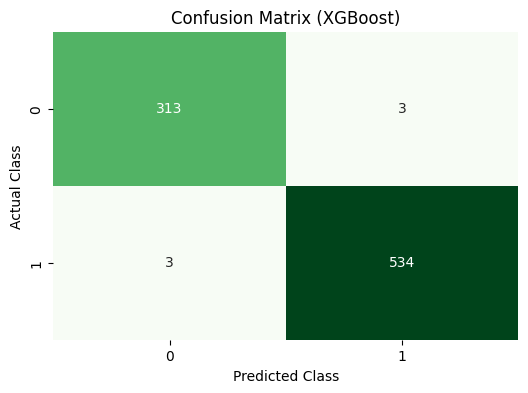

XGBoost Model Accuracy: 0.9929660023446659
XGBoost F1 Score (Macro): 0.9924598684675765
XGBoost F1 Score (Weighted): 0.9929660023446659


In [5]:
xgb_clf = xgb.XGBClassifier(random_state=42)

labels = np.unique(y)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    xgb_clf.fit(X_train, y_train)

    xgb_y_pred = xgb_clf.predict(X_test)

    xgb_cm = confusion_matrix(y_test, xgb_y_pred)

    xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
    xgb_f1 = f1_score(y_test, xgb_y_pred, average='macro')
    xgb_f1_weighted = f1_score(y_test, xgb_y_pred, average='weighted')

plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap='Greens', cbar=False)
plt.title('Confusion Matrix (XGBoost)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(f"XGBoost Model Accuracy: {xgb_accuracy}")
print(f"XGBoost F1 Score (Macro): {xgb_f1}")
print(f"XGBoost F1 Score (Weighted): {xgb_f1_weighted}")

In [6]:
# Evaluate model stability with cross-validation

cv_scores = cross_val_score(xgb_clf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores for XGBoost:", cv_scores)
print("Mean Cross-Validation Accuracy for XGBoost:", cv_scores.mean())

Cross-Validation Scores for XGBoost: [0.99297424 0.98477752 0.99765808 0.99180328 0.992966  ]
Mean Cross-Validation Accuracy for XGBoost: 0.9920358234197529


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

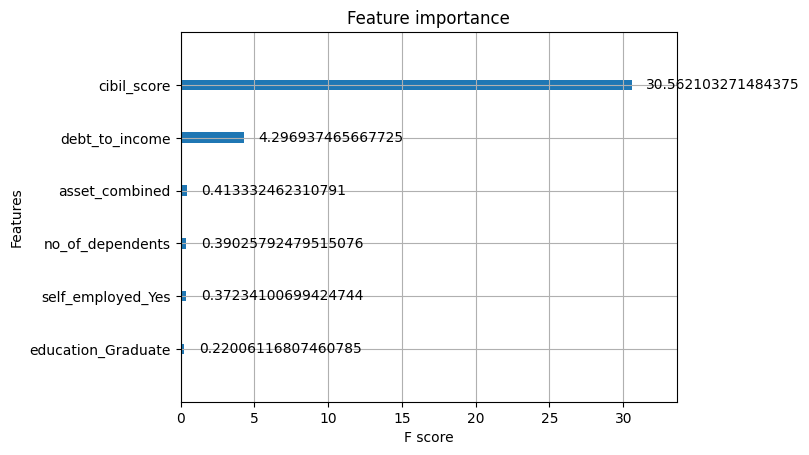

In [7]:
#XGBoost feature importance

xgb_clf.fit(X_train, y_train)
plot_importance(xgb_clf, importance_type='gain')

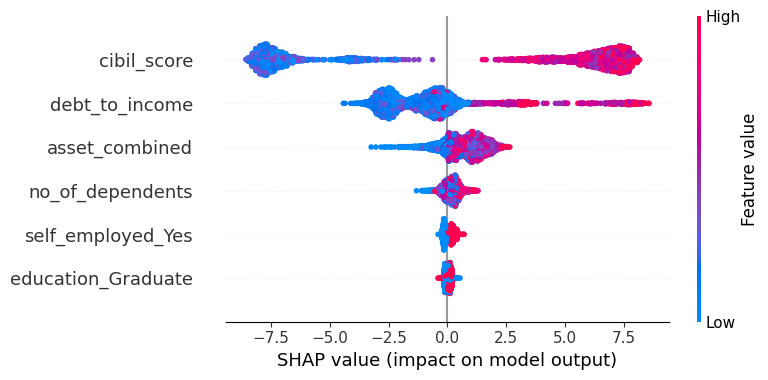

In [8]:
#SHAP feature importance score

explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

**Gradient Boosting Classifier**

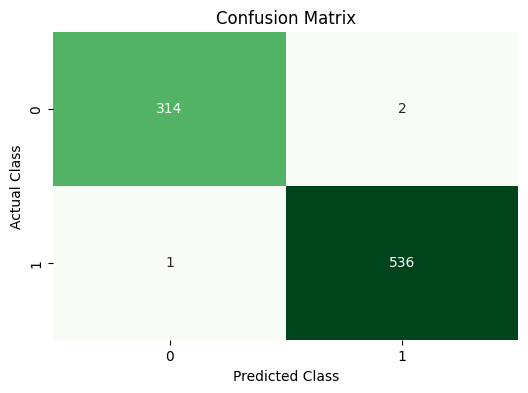

GBC Model Accuracy: 0.9964830011723329
GBC F1 Score (Macro): 0.9962274720819666
GBC F1 Score (Weighted): 0.9964818501403943


In [9]:
gbc = GradientBoostingClassifier(random_state=42)

labels = np.unique(y)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    gbc.fit(X_train, y_train)

    gbc_y_pred = gbc.predict(X_test)

    gbc_cm = confusion_matrix(y_test, gbc_y_pred)

    gbc_accuracy = accuracy_score(y_test, gbc_y_pred)
    gbc_f1 = f1_score(y_test, gbc_y_pred, average='macro')
    gbc_f1_weighted = f1_score(y_test, gbc_y_pred, average='weighted')

plt.figure(figsize=(6,4))
sns.heatmap(gbc_cm, annot=True, fmt="d", cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(f"GBC Model Accuracy: {gbc_accuracy}")
print(f"GBC F1 Score (Macro): {gbc_f1}")
print(f"GBC F1 Score (Weighted): {gbc_f1_weighted}")

In [10]:
# Evaluate model stability with cross-validation
cv_scores = cross_val_score(gbc, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Gradient Boosting:", cv_scores)
print("Mean Cross-Validation Accuracy for Gradient Boosting:", cv_scores.mean())

Cross-Validation Scores for Gradient Boosting: [0.99297424 0.98946136 0.99882904 0.99531616 0.99765533]
Mean Cross-Validation Accuracy for Gradient Boosting: 0.9948472260735631


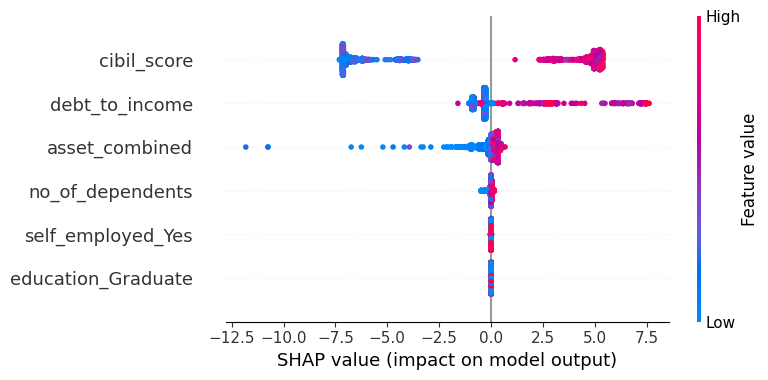

In [11]:
#SHAP feature importance score

explainer = shap.TreeExplainer(gbc)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

**NaiveBayes**

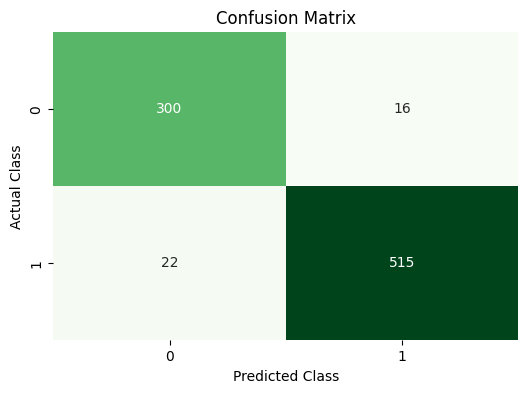

GNB Model Accuracy: 0.9554513481828839
GNB F1 Score (Macro): 0.9524291735643925
GNB F1 Score (Weighted): 0.955535687939679


In [12]:
gnb = GaussianNB()

labels = np.unique(y)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    gnb.fit(X_train, y_train)

    gnb_y_pred = gnb.predict(X_test)

    gnb_cm = confusion_matrix(y_test, gnb_y_pred)

    gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
    gnb_f1 = f1_score(y_test, gnb_y_pred, average='macro')
    gnb_f1_weighted = f1_score(y_test, gnb_y_pred, average='weighted')


plt.figure(figsize=(6,4))
sns.heatmap(gnb_cm, annot=True, fmt="d", cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(f"GNB Model Accuracy: {gnb_accuracy}")
print(f"GNB F1 Score (Macro): {gnb_f1}")
print(f"GNB F1 Score (Weighted): {gnb_f1_weighted}")

**SVM**

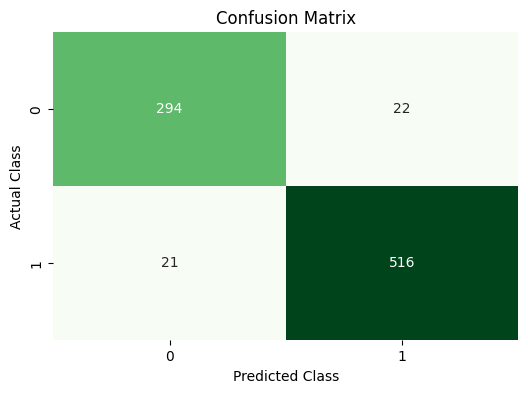

SVM Model Accuracy: 0.9495896834701055
SVM F1 Score (Macro): 0.9459270998415215
SVM F1 Score (Weighted): 0.9495731853456525


In [15]:
svm_clf = make_pipeline(StandardScaler(), SVC(random_state=42))

labels = np.unique(y)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    svm_clf.fit(X_train, y_train)

    svm_y_pred = svm_clf.predict(X_test)

    svm_br_cm = confusion_matrix(y_test, svm_y_pred)

    svm_accuracy = accuracy_score(y_test, svm_y_pred)
    svm_f1 = f1_score(y_test, svm_y_pred, average='macro')
    svm_f1_weighted = f1_score(y_test, svm_y_pred, average='weighted')


plt.figure(figsize=(6,4))
sns.heatmap(svm_br_cm, annot=True, fmt="d", cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(f"SVM Model Accuracy: {svm_accuracy}")
print(f"SVM F1 Score (Macro): {svm_f1}")
print(f"SVM F1 Score (Weighted): {svm_f1_weighted}")

**K-Nearest Neighbors**

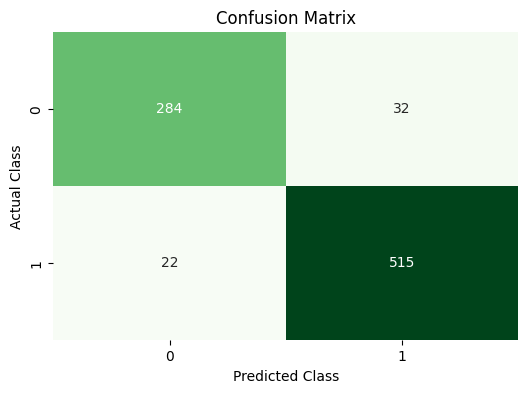

KNN Model Accuracy: 0.936694021101993
KNN F1 Score (Macro): 0.9316838907938918
KNN F1 Score (Weighted): 0.9364771323440665


In [16]:
knn_model = KNeighborsClassifier()

labels = np.unique(y)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    knn_model.fit(X_train, y_train)

    knn_y_pred = knn_model.predict(X_test)

    y_test = y_test.astype(int)
    knn_y_pred = knn_y_pred.astype(int)

    knn_cm = confusion_matrix(y_test, knn_y_pred)
    knn_accuracy = accuracy_score(y_test, knn_y_pred)
    knn_f1 = f1_score(y_test, knn_y_pred, average='macro')
    knn_f1_weighted = f1_score(y_test, knn_y_pred, average='weighted')

plt.figure(figsize=(6,4))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(f"KNN Model Accuracy: {knn_accuracy}")
print(f"KNN F1 Score (Macro): {knn_f1}")
print(f"KNN F1 Score (Weighted): {knn_f1_weighted}")

**Random Forest Classifier** *(Retrieved from original report for comparison)*

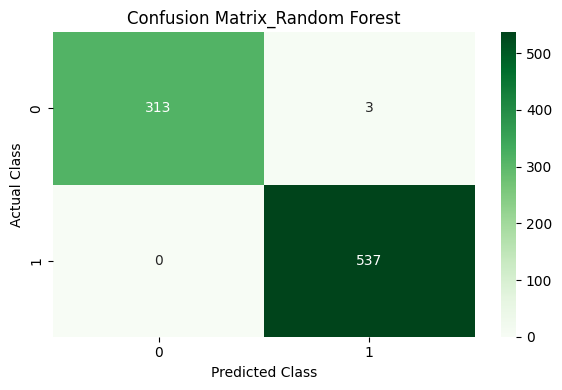

RF Model Accuracy: 0.9964830011723329
RF F1 Score (Macro): 0.9962225046609776
RF F1 Score (Weighted): 0.9964795123797701


In [17]:
best_rf = RandomForestClassifier(max_depth=17, n_estimators=445, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

# Train the model on the entire training set
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Create the confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_best_rf)

rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
rf_f1 = f1_score(y_test, y_pred_best_rf, average='macro')
rf_f1_weighted = f1_score(y_test, y_pred_best_rf, average='weighted')


plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap='Greens', cbar=True)
plt.title('Confusion Matrix_Random Forest')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.tight_layout()
#plt.savefig(f"CM_RF.jpg", bbox_inches='tight')
plt.show()
plt.close()

print(f"RF Model Accuracy: {rf_accuracy}")
print(f"RF F1 Score (Macro): {rf_f1}")
print(f"RF F1 Score (Weighted): {rf_f1_weighted}")

**ROC-AUC**

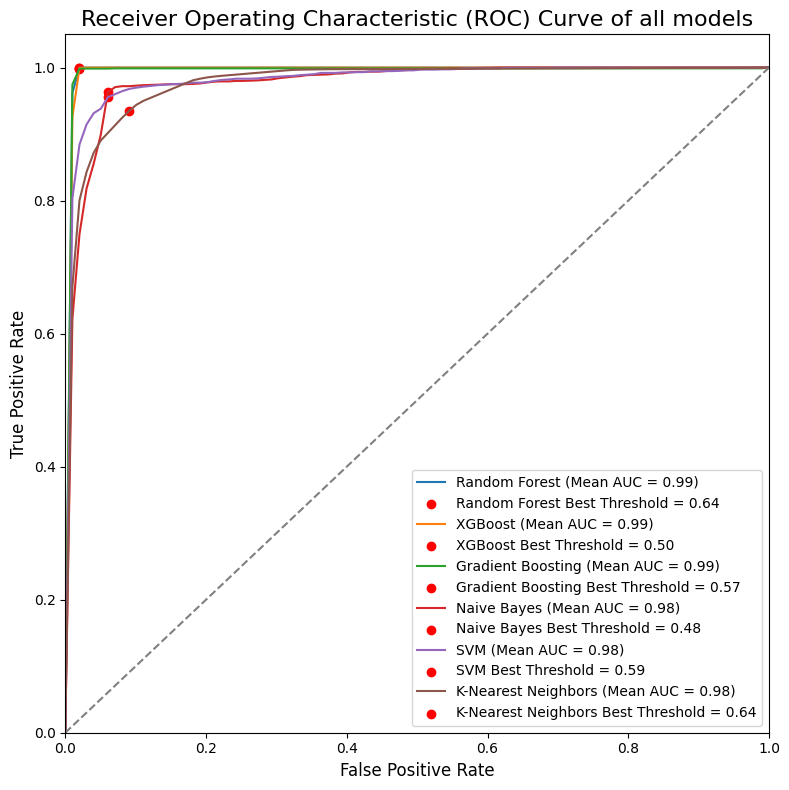

In [18]:
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

plt.figure(figsize=(8, 8))

for name, model in models.items():
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)
    aucs = []
    i = 0
    best_thresholds = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        model.fit(X_train, y_train)

        y_prob = model.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_prob)

        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        youden_index = tpr - fpr
        best_threshold_index = np.argmax(youden_index)
        best_threshold = thresholds[best_threshold_index]
        best_thresholds.append(best_threshold)

        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

        i += 1

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    mean_best_threshold = np.mean(best_thresholds)

    plt.plot(mean_fpr, mean_tpr, label=f'{name} (Mean AUC = {mean_auc:.2f})')

    # Calculate the best threshold index based on mean_fpr and mean_tpr
    youden_index = mean_tpr - mean_fpr
    best_threshold_index = np.argmax(youden_index)

    best_fpr = mean_fpr[best_threshold_index]
    best_tpr = mean_tpr[best_threshold_index]
    plt.scatter(best_fpr, best_tpr, marker='o', color='red', label=f'{name} Best Threshold = {mean_best_threshold:.2f}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve of all models', fontsize=16)
plt.legend(loc="lower right", fontsize=10)

plt.tight_layout()
plt.show()

**XGBoost - test absence of CIBIL score**

In [24]:
loan_new_df = loan_df.drop("cibil_score", axis=1)

In [32]:
#Splitting

X_drop = loan_new_df.drop(['loan_status_Approved'], axis=1)
y_drop = loan_new_df['loan_status_Approved']

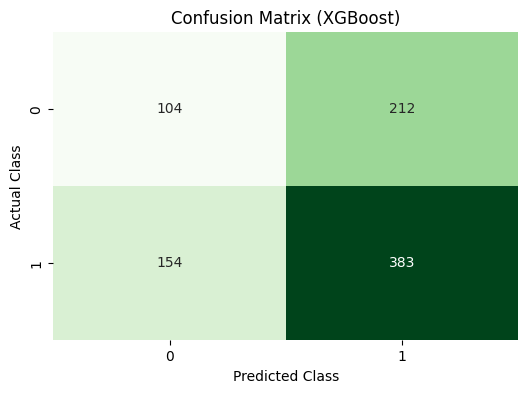

XGBoost Model Accuracy: 0.570926143024619
XGBoost F1 Score (Macro): 0.519523891604388
XGBoost F1 Score (Weighted): 0.5602403703279402


In [33]:
xgb_clf_drop = xgb.XGBClassifier(random_state=42)

labels = np.unique(y_drop)

for train_index, test_index in kf.split(X_drop):
    X_train, X_test = X_drop.loc[train_index], X_drop.loc[test_index]
    y_train, y_test = y_drop.loc[train_index], y_drop.loc[test_index]

    xgb_clf_drop.fit(X_train, y_train)

    xgb_y_drop = xgb_clf_drop.predict(X_test)

    xgb_cm_drop = confusion_matrix(y_test, xgb_y_drop)

    xgb_accuracy_drop = accuracy_score(y_test, xgb_y_drop)
    xgb_f1_drop = f1_score(y_test, xgb_y_drop, average='macro')
    xgb_f1_weighted_drop = f1_score(y_test, xgb_y_drop, average='weighted')

plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm_drop, annot=True, fmt="d", cmap='Greens', cbar=False)
plt.title('Confusion Matrix (XGBoost)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(f"XGBoost Model Accuracy: {xgb_accuracy_drop}")
print(f"XGBoost F1 Score (Macro): {xgb_f1_drop}")
print(f"XGBoost F1 Score (Weighted): {xgb_f1_weighted_drop}")